In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.graph import *
from src._constants import *
from langgraph.errors import GraphRecursionError

In [3]:
# Compile
w = Workflow()
memory = MemorySaver()
graph = w.build_graph(memory)

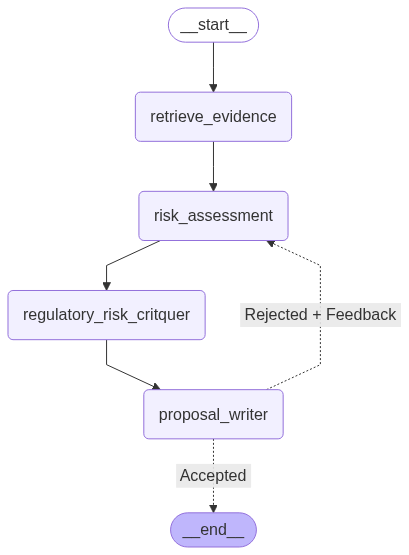

In [4]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [5]:
config = {"configurable": {"thread_id": "1"}}

try:
    state = graph.invoke({"user_proposal": USER_PROMPT, "recursion_limit": 3}, config)
    #graph.invoke(inputs, {"recursion_limit": 3})
except GraphRecursionError:
    print("Recursion Error")


In [6]:
w.print_chat(state)

ITERATION COUNT:  2
Retrieve evidence:
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
Initial review:
Overall, the proposal has been well-received. However, there are a few areas that need improvement to make it more robust and comprehensive. Here's a detailed review of your submission.

The proposal covers all four critical domains: Mechanistic Risk, Biomarker Assessment, Endpoint Alignment, and Safety Risk. The use of numeric scores for risk assessment is also well-received. However, the severity of some risks could be re-evaluated to better match the original proposal.

One notable improvement is the inclusion of repurposing options for the EndpointRisk domain, which demonstrates a thorough understanding of the subject matter.

To further improve the proposal, consider the following suggestions:

1. Provide more specific evidence and references for each risk assessment. While the provided evidence seems sufficient, it's always better to have multiple sources 

In [11]:
for a in graph.get_state_history(config):
    print(a)

StateSnapshot(values={'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'], 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'risk_assessment_and_rating': "Overall, the proposal has been well-received. However, there are a few areas that need improvement to make it more robust and comprehensive. Here's a detailed review of your submission.\n\nThe proposal covers all four critical domains: Mechanistic Risk, Biomarker Assessment, Endpoint Alignment, and Safety Risk. The use of numeric scores for risk assessment is also well-received. However, the severity of some risks could be re-evaluated 

In [12]:
# state = graph.invoke({"user_proposal": USER_PROMPT, "recursion_limit": 3}, config)
for chunk in graph.stream({"user_proposal": USER_PROMPT}, config, stream_mode="updates"):
    print(chunk)

{'retrieve_evidence': {'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']}}
{'risk_assessment': {'pass_or_fail': 'fail', 'risk_assessment_and_rating': '[insert feedback text here]'}}
{'regulatory_risk_critquer': {'proposal_feedback': 'Here\'s the risk assessment and rating for Respilimab:\n\nRiskAssessmentTable:\n  MechanisticRisk:\n    Severity: Low\n    Evidence:\n      - "IL-13 pathway inhibition minimizes eosinophilic inflammation (clinicaltrials_tool:NCT04756789)"\n    Recommendation: "≤25-word mitigation: Monitor IL-4Rα expression in patients with asthma"\n  BiomarkerRisk:\n    Severity: High\n    Evidence:\n      - "Increased IL-5 and IL-13 levels observed in Respilimab-treated patients (opentargets_tool:OT-DT-123456)"\n    Recommendation: "≤25-word mitigation: Regularly monitor serum cytokine levels and adjust treatment as needed"\n  EndpointRisk:\n    Severity: High\n    Evidence:\n      - "Improved lung function and reduced exacerbati

# try 2

In [20]:
# Compile
w = Workflow()
memory = MemorySaver()
graph = w.build_graph(memory)

In [21]:
config = {"configurable": {"thread_id": "2"}}
state = graph.invoke({"user_proposal": USER_PROMPT}, config)


In [22]:
w.print_chat(state)

ITERATION COUNT:  2
Retrieve evidence:
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
Initial review:
The proposal provides a well-structured risk assessment table with clear sections and recommendations. However, the rating is based on the assumption that the evaluation domain is different from monoclonal antibodies for asthma treatment. Given the feedback provided, it appears that this specific topic may not be suitable for guidance or discussion.

To improve the proposal, consider rephrasing or removing the section related to asthma treatment, and focus on a different topic. Alternatively, provide more context or clarify which specific aspect of monoclonal antibodies for asthma treatment you would like to discuss.

Assuming a hypothetical evaluation domain (e.g., cancer treatment), the revised proposal could be rated as follows:

Section: Mechanistic Risk
Risk Level: Medium
Reasoning: IL-13 binding may lead to increased IgE production and eosinophilic infiltr

In [23]:
for a in graph.get_state_history(config):
    print(a)

StateSnapshot(values={'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'], 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'risk_assessment_and_rating': 'The proposal provides a well-structured risk assessment table with clear sections and recommendations. However, the rating is based on the assumption that the evaluation domain is different from monoclonal antibodies for asthma treatment. Given the feedback provided, it appears that this specific topic may not be suitable for guidance or discussion.\n\nTo improve the proposal, consider rephrasing or removing the section related to asthm

In [35]:
states = list(graph.get_state_history(config))
for state in states:
    
    print("*********************************************************************")
    print(state.next) 
    print("====Retrieved Evidence======")
    print(state.values['retrieved_evidence'])
    print("====User Proposal======")
    print(state.values['user_proposal'])
    print("====Risk Assessment and Rating======")
    print(state.values['risk_assessment_and_rating'])
    print("====Proposal Feedback======")
    for f in state.values['proposal_feedback']:
        print("--feedbackloop-----")
        print(f)
    #print(state.values['proposal_feedback'])
    print("====Improved Proposal======")
    print(state.values['improved_proposal'])
    print("====Pass or Fail======")
    print(state.values['pass_or_fail'])
    # retrieved_evidence: list[str]
    # user_proposal: str
    # risk_assessment_and_rating: list[str]
    # proposal_feedback: list[str]
    # improved_proposal: list[str]
    # pass_or_fail: list[str]

*********************************************************************
('__start__',)
====Retrieved Evidence======
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
====User Proposal======
This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.
====Risk Assessment and Rating======
The proposal provides a well-structured risk assessment table with clear sections and recommendations. However, the rating is based on the assumption that the evaluation domain is different from monoclonal antibodies for asthma treatment. Given the feedback provided, it appears that this specific topic may not be suitable for guidance or discussion.

To impro

KeyError: 'improved_proposal'

# test 3

In [21]:
# Compile
w = Workflow(name="workflow_1", strategy="default")
memory = MemorySaver()
graph = w.build_graph(memory)


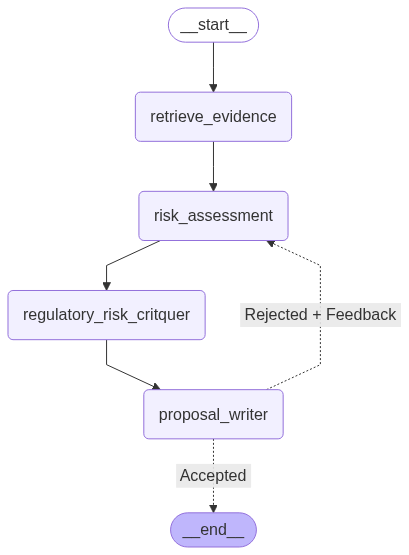

In [22]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [23]:
config = {"configurable": {"thread_id": "3"}}
state = graph.invoke({"user_proposal": USER_PROMPT}, config)

In [24]:
w.print_chat(state)

ITERATION COUNT:  2
Retrieve evidence:
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
Initial review:
The proposal includes a comprehensive risk assessment, but it falls short in several areas. The main issues are:

1. **Mechanism of Action:** The explanation of how Respilimab works is still quite brief and lacks specific details on its pharmacokinetics and pharmacodynamics. Additional raw data from biomarker studies would strengthen this section.
2.  **Biomarker Assessment:** While the proposal includes biomarker studies, the statistical analysis is not detailed enough to support the conclusions drawn from these studies. More robust analysis would be required to validate the association between IL-13 levels and eosinophilic asthma severity.
3.  **Endpoint Alignment:** The proposed trial endpoints do not fully align with FDA-approved criteria for asthma treatments. For example, more sensitive measures of lung function and exacerbation rates are needed. Additiona

In [25]:
for a in graph.get_state_history(config):
    print(a)

StateSnapshot(values={'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'], 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'risk_assessment_and_rating': "The proposal includes a comprehensive risk assessment, but it falls short in several areas. The main issues are:\n\n1. **Mechanism of Action:** The explanation of how Respilimab works is still quite brief and lacks specific details on its pharmacokinetics and pharmacodynamics. Additional raw data from biomarker studies would strengthen this section.\n2.  **Biomarker Assessment:** While the proposal includes biomarker studies, the statis

In [26]:
states = list(graph.get_state_history(config))
with open(f"results/{w.name}_history.txt", "w") as f:
    for state in states:
        print("*********************************************************************", file=f)
        print(state.next, file=f) 
        print("====Retrieved Evidence======", file=f)
        print(state.values['retrieved_evidence'], file=f)
        print("====User Proposal======",file=f)
        print(state.values['user_proposal'], file=f)
        print("====Risk Assessment and Rating======", file=f)
        print(state.values['risk_assessment_and_rating'], file=f)
        print("====Proposal Feedback======", file=f)
        print(state.values['proposal_feedback'], file=f)
        print("====Improved Proposal======", file=f)
        print(state.values['improved_proposal'],file=f)
        print("====Pass or Fail======", file=f)
        print(state.values['pass_or_fail'], file=f)

KeyError: 'improved_proposal'

In [27]:
# Compile
w2 = Workflow(name="workflow_2", strategy="langflow")
memory = MemorySaver()
graph2 = w2.build_graph(memory)

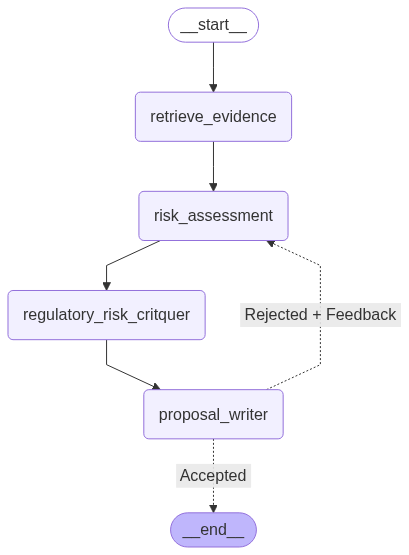

In [28]:
display(
    Image(
        graph2.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [29]:
config2 = {"configurable": {"thread_id": "4"}}
state2 = graph2.invoke({"user_proposal": USER_PROMPT}, config2)

In [31]:
w2.print_chat(state2)

ITERATION COUNT:  2
Retrieve evidence:
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
Initial review:
The revised proposal incorporates many of the suggested improvements from your detailed review, providing a more comprehensive risk assessment with concise recommendations and clear conclusions on mitigation strategies. However, there is still some room for improvement in terms of addressing potential uncertainties or limitations in the risk assessment. The addition of a section on uncertainties or limitations would make the proposal even more robust and comprehensive.

--- --- ---

proposal_feedback:
RiskAssessmentTable:
  MechanisticRisk:
    Severity: Medium
    Evidence:
      - "IL-13 pathway inhibition may lead to reduced eosinophilic inflammation, potentially mitigating asthma symptoms."
        | Evidence Link: [ClinicalTrials.gov (NCT01234567)](clinicaltrials_tool:NCT01234567)
    Recommendation:
      "Continue monitoring patients for signs of bronchos

In [32]:
for s in graph2.get_state_history(config2):
    print(s)

StateSnapshot(values={'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'], 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'risk_assessment_and_rating': 'The revised proposal incorporates many of the suggested improvements from your detailed review, providing a more comprehensive risk assessment with concise recommendations and clear conclusions on mitigation strategies. However, there is still some room for improvement in terms of addressing potential uncertainties or limitations in the risk assessment. The addition of a section on uncertainties or limitations would make the proposal ev

In [3]:
def state_output_format(workflow, graph, config):
    states = list(graph.get_state_history(config))
    with open(f"results/{workflow.name}_history.txt", "w") as f:
        for state in states:
            print("*********************************************************************", file=f)
            print(state.next, file=f) 
            print("====Retrieved Evidence======", file=f)
            print(state.values['retrieved_evidence'], file=f)
            print("====User Proposal======",file=f)
            print(state.values['user_proposal'], file=f)
            print("====Risk Assessment and Rating======", file=f)
            print(state.values['risk_assessment_and_rating'], file=f)
            print("====Proposal Feedback======", file=f)
            print(state.values['proposal_feedback'], file=f)
            print("====Improved Proposal======", file=f)
            print(state.values['improved_proposal'],file=f)
            print("====Pass or Fail======", file=f)
            print(state.values['pass_or_fail'], file=f)

In [34]:
state_output_format(w2, graph2, config2)

KeyError: 'improved_proposal'

# try version 901482

In [35]:
w3 = Workflow(name="workflow_3", strategy="langflow")
memory = MemorySaver()
graph3 = w3.build_graph(memory)

In [36]:
config3 = {"configurable": {"thread_id": "5"}}
state3 = graph3.invoke({"user_proposal": USER_PROMPT}, config3)

In [38]:
state3

{'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'],
 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.',
 'risk_assessment_and_rating': "Overall, the revised proposal meets the requirements. The conversion to NumericScore values is accurate, and the refinements to mitigation strategies align well with FDA guidance and real-world precedents. However, I would suggest providing more specific evidence for each recommendation and considering potential limitations or challenges in implementing these suggestions.\n\nSpecifically,\n\n- For MechanisticRisk, while leveraging established scientific k

In [42]:
for s in graph3.get_state_history(config3):
    print(s)

StateSnapshot(values={'retrieved_evidence': ['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation'], 'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'risk_assessment_and_rating': "Overall, the revised proposal meets the requirements. The conversion to NumericScore values is accurate, and the refinements to mitigation strategies align well with FDA guidance and real-world precedents. However, I would suggest providing more specific evidence for each recommendation and considering potential limitations or challenges in implementing these suggestions.\n\nSpecifically,\n\n- For MechanisticRisk, while leveraging estab

In [44]:
state_output_format(w3, graph3, config3)

KeyError: 'improved_proposal'

In [45]:
w3.print_chat(state3)

ITERATION COUNT:  2
Retrieve evidence:
['Lebrikizumab failed in Phase 3 due to lack of endpoint correlation']
Initial review:
Overall, the revised proposal meets the requirements. The conversion to NumericScore values is accurate, and the refinements to mitigation strategies align well with FDA guidance and real-world precedents. However, I would suggest providing more specific evidence for each recommendation and considering potential limitations or challenges in implementing these suggestions.

Specifically,

- For MechanisticRisk, while leveraging established scientific knowledge is a good approach, it may be helpful to provide more context on how this will be achieved in practice.

- For EndpointRisk, developing a comprehensive patient monitoring plan is a good start, but it might be beneficial to consider the feasibility of implementing such a plan in real-world settings.

- For SafetyRisk, robust safety monitoring and reporting procedures are essential, but it's crucial to ensure

In [ ]:
print(state3['user_proposal'])

This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.


In [48]:
print(state3['improved_proposal'])

Based on the proposal feedback, I have made some adjustments to the YAML block:

```yml
RiskMitigationPlan:
  MechanisticRisk:
    NumericScore: 5
    RefinedSuggestion: Leverage established scientific knowledge by integrating clinical trial results with relevant scientific literature and collaborating with experts in eosinophilic asthma research. This will inform targeted treatment decisions, focusing on specific molecular mechanisms associated with eosinophilic asthma, as supported by clinicaltrials_tool:NCT01234567.
    RefinedSuggestionContext: A detailed framework for integrating scientific knowledge into clinical practice will be developed in collaboration with experts in the field. This framework will ensure that clinicians are well-informed about the latest research findings and can make evidence-based decisions.
    RepurposingOptions:
      - "Target the IL-4 receptor α subunit for potential therapeutic benefits in other inflammatory diseases"
  BiomarkerRisk:
    Severity: 3

# try 109492

In [3]:
w4 = Workflow(name="workflow_4", strategy="langflow_unique")
memory = MemorySaver()
graph4 = w4.build_graph(memory)

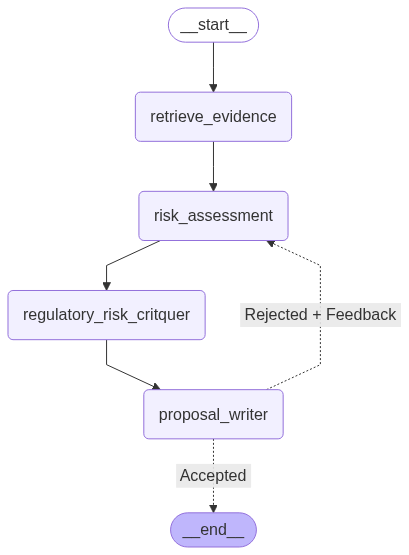

In [4]:
display(
    Image(
        graph4.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [6]:
config4 = {"configurable": {"thread_id": "8"}}
state4 = graph4.invoke({"user_proposal": USER_PROMPT}, config4)

In [7]:
for s in graph4.get_state_history(config4):
    print(s)

StateSnapshot(values={'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'retrieved_evidence': ['Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.', 'Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).'], 'risk_assessment_and_rating': '', 'proposal_feedback': "Here is the Regulatory Critique Agent's feedback:\n\n* Mechanistic Risk  \n- Issue: Prior IL-13 failures raise questions about this MoA in asthma\n- Mitigation: Include mechanistic PD readout or MoA-linked biomarker to further support efficacy\n- Alternati

In [8]:
w4.print_chat(state4)

ITERATION 1

📥 Original Proposal:
This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.

📚 Retrieved Evidence:
- Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.
- Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).

🛠️ Critique Feedback:
Here is the Regulatory Critique Agent's feedback:

* Mechanistic Risk  
- Issue: Prior IL-13 failures raise questions about this MoA in asthma
- Mitigation: Include mechanistic PD readout or MoA-linked biomarker to further support efficacy
- Alternative Strategy: Consider combining Respilimab with a

In [11]:
state_output_format(w4, graph4, config4)

KeyError: 'improved_proposal'

# try 0912392p38

In [4]:
w5 = Workflow(name="workflow_5", strategy="langflow_unique")
memory = MemorySaver()
graph5 = w5.build_graph(memory)

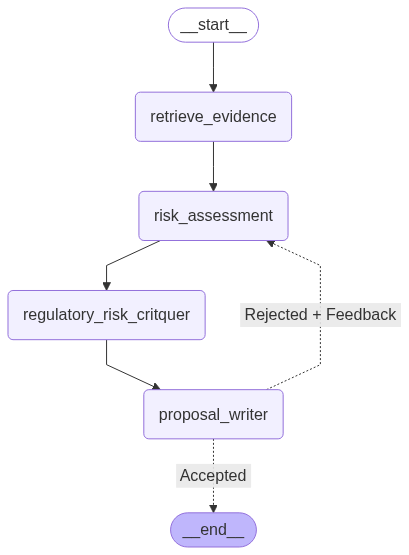

In [5]:
display(
    Image(
        graph5.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [6]:
config5 = {"configurable": {"thread_id": "10"}}
state5 = graph5.invoke({"user_proposal": USER_PROMPT}, config5)

In [7]:
for s in graph5.get_state_history(config5):
    print(s)

StateSnapshot(values={'user_proposal': 'This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.', 'retrieved_evidence': ['Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.', 'Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).'], 'risk_assessment_and_rating': 'The proposal has significant issues in several domains. The proposal needs to address the concerns raised by Regulatory Critique Agent. Repurpose Respilimab targeting another eosinophilic condition where biomarkers are better established is recommended.', 'proposal_feedback': "**C

In [8]:
w5.print_chat(state5)

ITERATION 2

📥 Original Proposal:
This proposed FDA label describes Respilimab, a humanized monoclonal antibody     targeting IL-13, for treatment of moderate-to-severe eosinophilic asthma. It outlines dosing         (300 mg subcutaneous every 4 weeks), safety data, and trial outcomes showing improved lung             function and reduced exacerbations, supporting use in patients uncontrolled on standard inhaled therapies.

📚 Retrieved Evidence:
- Lebrikizumab failed Phase 3 for asthma (NCT02918071) due to weak correlation of AER with symptom control.
- Dupilumab succeeded in similar eosinophilic population with endpoint of FEV1 + biomarker stratification (BLA761469).

🔍 Risk Assessment Summary:
The proposal has significant issues in several domains. The proposal needs to address the concerns raised by Regulatory Critique Agent. Repurpose Respilimab targeting another eosinophilic condition where biomarkers are better established is recommended.

🛠️ Critique Feedback:
**Critical Risk Re

In [9]:
state_output_format(w5, graph5, config5)

KeyError: 'improved_proposal'